In [1]:
import requests

#Important Libraries
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Data Encoding
from sklearn.preprocessing import  OneHotEncoder

#Preprocessing
from sklearn.preprocessing import StandardScaler

#To handle imbalanced data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#Classifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **The three following cells loads the different datasets. Run the cell which you want to implement the modell on**

In [20]:
#Synthetic dataset
synth_train = pd.read_csv('/content/drive/MyDrive/Degree Project/train.zip', delimiter=',')
synth_test = pd.read_csv('/content/drive/MyDrive/Degree Project/test.zip', delimiter=',')
def data(df):
  Y = df['Label']                                  #Labels
  Y = Y.to_numpy()
  X = df.to_numpy()
  X = np.delete(X, -1, axis=1)
  X1 = X[:,0:2]                                    #Categorical Features
  X2 = X[:, 2:]                                    #Numerical Features
  X1 = OneHotEncoder().fit_transform(X1).toarray() #Encode categorical features
  X = np.concatenate((X1,X2), axis=1)
  X = StandardScaler().fit_transform(X)            #Standardizes data
  X = np.asarray(X).astype('float32')
  Y = np.asarray(Y).astype('float32')
  return X,Y

X_train, Y_train = data(synth_train)
X_test, Y_test = data(synth_test)

In [ ]:
#Malware-detection dataset
Malware = ZipFile('/content/drive/MyDrive/Degree Project/malware-detection.zip') #All csv-files are in one zip-folder. This line "extracts" all files.
Malware_train = pd.read_csv(Malware.open('Kaggle-data.csv'), delimiter=',', low_memory=False) 
Malware_train = Malware_train.drop('Unnamed: 57', axis=1) 
Malware_train = Malware_train.drop('md5', axis=1)
#Malware_train = Malware_train.drop('Machine', axis=1)
Malware_test = pd.read_csv(Malware.open('tek_data.csv'), delimiter=',', low_memory=False)
#Malware_test = Malware_test.drop('Machine', axis=1)

def data(df):
  df.dropna().astype(np.float32)                           #Deletes rows with misssing values
  Y = (df['legitimate']==0)*1
  X = df.to_numpy()
  X = np.delete(X, -1, axis =1)
  #X = StandardScaler().fit_transform(X)
  # normal_indx = np.where(Y==0)                      #Index of normal observations
  # anomaly_indx = np.where(Y==0)                     #Index of anomalies
  # X_normal  = X[normal_indx,:]
  # X_anomaly = X[anomaly_indx,:]
  # Y_normal  = Y[normal_indx]
  # Y_anomaly = Y[anomaly_indx]
  return X,Y

X_train, Y_train = data(Malware_train)
X_test, Y_test = data(Malware_test)

ValueError: ignored

,ID,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,216352.000000,216352.000000,216352.000000,216351.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000
mean,108176.500000,225.390197,4658.018849,9.052688,4.297964,3.953857e+05,5.827978e+05,1.332425e+06,2.812198e+05,9.263616e+04,2.597506e+05,6.825622e+14,8.973149e+03,876.249815,5.891214,1.908686,65.019649,62.194170,4.915735,1.062089,8.306375e+05,1.444321e+03,1.198387e+08,2.211697,19125.945395,8.226597e+07,8.135296e+07,1.375880e+06,4.596753e+04,9.237207e+04,6.160888e+04,4.907304,4.500140,2.046629,6.780452,1.623791e+05,1.908853e+04,5.588631e+05,1.824943e+05,2.066624e+04,6.279258e+05,7.375374,114.004788,4.702134,24.093205,21.311201,3.758643,2.391066,5.149387,9.997022e+04,7.139624e+04,2.524535e+05,1.023401e+06,7.888492,0.348982
std,62455.587057,4.559983,7843.855241,71.522478,11.965284,1.962775e+07,2.841106e+07,7.337809e+07,1.254327e+07,9.922827e+06,6.712844e+06,1.121701e+17,7.194441e+05,1362.854293,183.580174,227.045651,1163.764427,1153.224766,1.041145,144.727471,6.859762e+06,5.878291e+03,4.965103e+08,0.500514,16258.493510,3.782155e+10,3.782156e+10,1.478766e+08,7.974684e+06,1.370714e+07,1.242031e+07,2.554187,1.121715,1.825340,1.049097,6.451482e+06,3.186122e+05,2.573865e+07,3.393885e+06,3.189600e+05,1.073093e+07,727.966935,137.024438,36.612958,267.169003,130.677090,1.305126,1.042133,1.864471,1.718201e+07,1.681531e+07,2.433613e+07,4.772522e+07,8.049384,0.476649
min,1.000000,176.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,0.000000e+00,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.520000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,54088.750000,224.000000,258.000000,7.000000,0.000000,2.560000e+04,1.536000e+04,0.000000e+00,1.253800e+04,4.096000e+03,2.457600e+04,4.194304e+06,4.096000e+03,512.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.228800e+05,1.024000e+03,3.388675e+04,2.000000,320.000000,1.048576e+06,4.096000e+03,1.048576e+06,4.096000e+03,0.000000e+00,1.600000e+01,4.000000,3.746777,0.020393,6.305549,1.361920e+04,5.12000

In [2]:
#KDD-Cup 99 dataset
KDD_train = pd.read_csv('/content/drive/MyDrive/Degree Project/kddcup.data_10_percent.gz', compression='gzip').dropna() 
KDD_test = pd.read_csv('/content/drive/MyDrive/Degree Project/corrected.gz', compression='gzip').dropna()
KDD_train.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

KDD_test.columns = KDD_train.columns
#Remove duplicates
KDD_train = KDD_train.drop_duplicates(keep=False)
KDD_test = KDD_test.drop_duplicates(keep=False)
#Change outcome to 0 if normal and 1 if anomalous
KDD_train['outcome'] = (KDD_train['outcome']!='normal.')*1
KDD_test['outcome'] = (KDD_test['outcome']!='normal.')*1
def data(df):
  X = df.to_numpy()
  Y = X[:,-1]
  X = np.delete(X, -1, axis=1)
  X1 = np.array([X[:,0]]).transpose()
  X2 = OneHotEncoder().fit_transform(X[:,1:2]).toarray()
  X3 = X[:,4:]
  X = np.concatenate((X1,X2,X3), axis=1)
  X = np.asarray(X).astype('float32')
  Y = np.asarray(Y).astype('float32')
  X = StandardScaler().fit_transform(X)
  normal_indx = np.where(Y==0)                      #Index of normal observations
  anomaly_indx = np.where(Y==1)                     #Index of anomalies
  X_normal  = X[normal_indx]
  X_anomaly = X[anomaly_indx]
  Y_normal  = Y[normal_indx]
  Y_anomaly = Y[anomaly_indx]
  return X,X_normal,X_anomaly,Y,Y_normal,Y_anomaly

X_train,X_normal_train,X_anomaly_train,Y_train,Y_normal_train,Y_anomaly_train = data(KDD_train)
X_test,X_normal_test,X_anomaly_test,Y_test,Y_normal_test,Y_anomaly_test       = data(KDD_test) 

In [ ]:
#Random Forest
#Optimizing hyperparameters
for n in [10,25,50,75,100]:
  for d in [2,4,8,10]:
    RandomForest = RandomForestClassifier(n_estimators = n,
                                          max_depth = d,
                                          criterion = 'gini',
                                          class_weight = 'balanced_subsample'
                                          )
    RandomForest.fit(X_train, Y_train)
    y_pred = RandomForest.predict(X_test)
    print(confusion_matrix(Y_test,y_pred), 'F_1={}'.format(f1_score(Y_test,y_pred)),'#Estimators={}'.format(n),'Max depth={}'.format(d), '\n')
  print('----------------------------------------------------------')


In [25]:
#Optimal Random Forest

RandomForest = RandomForestClassifier(n_estimators = 100,
                                          max_depth = 8,
                                          min_impurity_decrease = 0.001,
                                          criterion = 'gini',
                                          class_weight = 'balanced_subsample'
                                          )
RandomForest.fit(X_train, Y_train)
scores = RandomForest.predict_proba(X_test)

In [5]:
#Evaluate scores
def evaluate(Y_real, scores, Dataset='Synthetic'): #Dataset is 
  #Distribution of scores
  plt.figure()
  plt.hist(scores, bins=50)
  plt.xlabel("Anomaly score")
  plt.ylabel("No of examples")
  plt.title('Distribution of anomaly scores')
  plt.show()
  #PPrecision-Recall curve
  precision, recall, thresholds = precision_recall_curve(Y_real, scores)
  auc_precision_recall = auc(recall, precision)
  indx = np.where(precision==0.)
  precision = np.delete(precision,indx)
  recall = np.delete(recall,indx)
  thresholds = np.delete(thresholds,indx)
  plt.figure()
  plt.plot(recall,precision)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title(Dataset+' datset')
  plt.show()
  #Performance Scores
  F1_scores      = 2*precision*recall/(precision+recall)
  F1_max         = np.max(F1_scores)
  threshold_indx = np.where(F1_scores==F1_max) 
  y_pred = scores>=thresholds[threshold_indx]
  CM = confusion_matrix(Y_test,y_pred)

  TNR = CM[0,0] #True negative rate
  TPR = CM[1,1] #True positive rate
  FNR = CM[0,1] #False negative rate
  FPR = CM[1,0] #False positive rate

  #Table of performance metrics
  data = {'AUC_precision_recall': [auc_precision_recall], 'F1': [F1_max], 'TNR': [TNR], 'TPR': [TPR], 'FNR': [FNR], 'FPR': [FPR]}
  performance = pd.DataFrame(data, columns=['AUC_precision_recall', 'F1', 'TNR', 'TPR', 'FNR', 'FPR'], index=[Dataset])
  display(performance)
  return performance

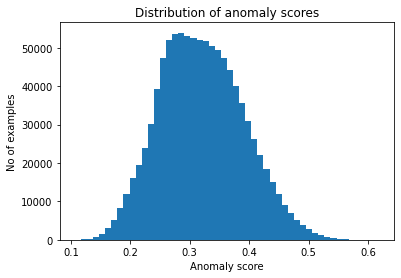

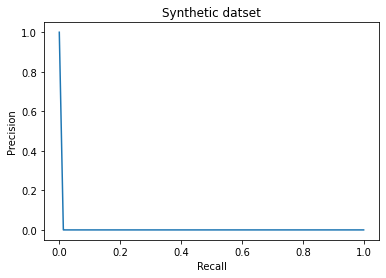

,AUC_precision_recall,F1,TNR,TPR,FNR,FPR
Synthetic,0.000082,0.000189,576471,40,423529,35


In [26]:
table = evaluate(Y_test, scores[:,1],Dataset='Synthetic')

In [27]:
print(table.to_latex(index=True, multirow=True))

\begin{tabular}{lrrrrrr}
\toprule
{} &  AUC\_precision\_recall &        F1 &     TNR &  TPR &     FNR &  FPR \\
\midrule
Synthetic &              0.000082 &  0.000189 &  576471 &   40 &  423529 &   35 \\
\bottomrule
\end{tabular}

